# Using Machine Learning Tools: Workshop 2

**Chapter 1 – The Machine Learning landscape**

This is a modified version of the code accompanying Chapter 1 of 
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

--------------------------------------------------------------------

First check we have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model

# Some useful commands to save us the hassle of having tiny writing
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Load the data using a pandas function
housing = pd.read_csv("workshop2.csv")

### **Data Inspection** - **Garbage - In, Garbage Out**
The relevance of working with **good** data

As always, the first job in any data analysis project is just having a look at the raw data to get an idea of what we are looking at, whether this simply be kinds of data we have (numerical, categorical) the ranges they occur over (are they tiny numbers, huge numbers) or variation (is there already a lot of variation in some of the values, or are they all the same).

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


The data contains information from the 1990 California census. This is available in [Geron's book](https://www.kaggle.com/datasets/camnugent/california-housing-prices) where you can see the description of each feature.

* **longitude**: A measure of how far west a house is; a higher value is farther west
* **latitude**: A measure of how far north a house is; a higher value is farther north
* **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
* **totalRooms**: Total number of rooms within a block
* **totalBedrooms**: Total number of bedrooms within a block
* **population**: Total number of people residing within a block
* **households**: Total number of households, a group of people residing within a home unit, for a block
* **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
* **oceanProximity**: Location of the house w.r.t ocean/sea

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.648344,28.656928,537.870553,1425.379942,499.539680,3.870623,206855.816909
std,2.003532,3.200177,12.848021,421.385070,1132.583966,382.329753,1.899920,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,378.000000,400.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Manipulating data**

You can use different function to remove columns or rows from your dataframe. Also you can filter your dataframe using functions like:
`iloc` (integer position-based) and `loc` (label-based).

Now, we want to remove the column `ocean_proximity`

In [6]:
# This is the more straightforward way to select only specific columns
#print(housing[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]])

# You can perform this task using iloc
#print(housing.iloc[:,0:9])

# Also, we can use loc
#print(housing.loc[:,"longitude":"median_house_value"])

# We can remove columns or rows using drop
housing = housing.drop(['ocean_proximity'],axis = 1)

In [7]:
# Check again our data - ocean_proximity should be removed
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


### **Missing Values**

It is always a good idea to check whether there are empty values in your data set. Otherwise many calculations will throw up garbage values. Moreover, you need to come up with a sensible approach to deal with these values. This can be as simple just removing any row with no data or using more complex imputation methods to predict the missing values.

In [8]:
print(np.sum(housing.isna()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [9]:
# We can check the rows where are these values specifically
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47,??,NaN,570,218,4.3750,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400
563,-122.24,37.75,45,??,NaN,384,146,4.9489,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100


In [10]:
# We can remove the rows where there are missing values using dropna
housing = housing.dropna()

In [11]:
# Now, we can check other problems. For instance, it seems that total_rooms has weird symbols or not?
housing['total_rooms'].head(15)

0      880
1     7099
2     1467
3     1274
4     1627
5      919
6     2535
7     3104
8     2555
9     3549
10      ??
11    3503
12    2491
13     696
14    2643
Name: total_rooms, dtype: object

In [12]:
# Now, we are pretty sure that we have problems with this feature
housing.loc[housing['total_rooms'] == "??",:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10,-122.26,37.85,52,??,434.0,910,402,3.2031,281500
29,-122.28,37.84,52,??,160.0,395,155,1.6875,132000
42,-122.26,37.84,49,??,202.0,462,189,1.0250,118800
58,-122.28,37.82,52,??,341.0,1074,304,1.2171,80300
72,-122.29,37.81,49,??,204.0,560,152,1.7500,75000
...,...,...,...,...,...,...,...,...,...
20552,-121.80,38.68,11,??,892.0,1847,747,3.4331,120600
20561,-121.77,38.67,42,??,518.0,1548,534,2.2794,108900
20572,-121.98,38.52,27,??,565.0,1583,514,2.7989,126700
20606,-121.57,39.12,30,??,534.0,1702,506,2.0800,56600


In [13]:
# We can convert that value to a number or convert to a missing value
housing['total_rooms']  = pd.to_numeric(housing['total_rooms'],errors='coerce')

In [14]:
# Now, we need to remove these missing values
housing = housing.dropna() 

In [15]:
# We can check again if all our variables are numeric or not
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19426 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19426 non-null  float64
 1   latitude            19426 non-null  float64
 2   housing_median_age  19426 non-null  int64  
 3   total_rooms         19426 non-null  float64
 4   total_bedrooms      19426 non-null  float64
 5   population          19426 non-null  int64  
 6   households          19426 non-null  int64  
 7   median_income       19426 non-null  float64
 8   median_house_value  19426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


### **Basic Visualisation**

After the basic perusal of the data, the next step is to do some basic visualisations. This is particularly useful for understanding what kind of data you have. Seeing distributions of data can tell you a lot about how hard your problem is going to be.

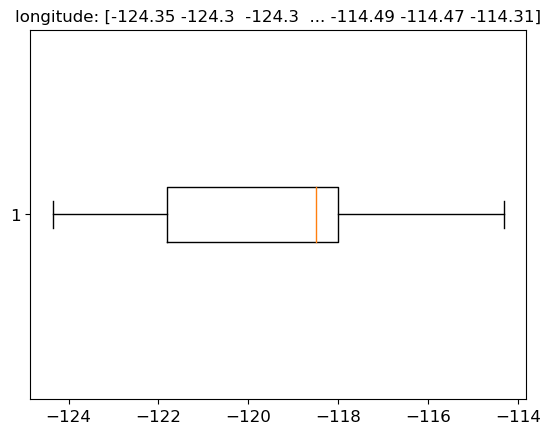

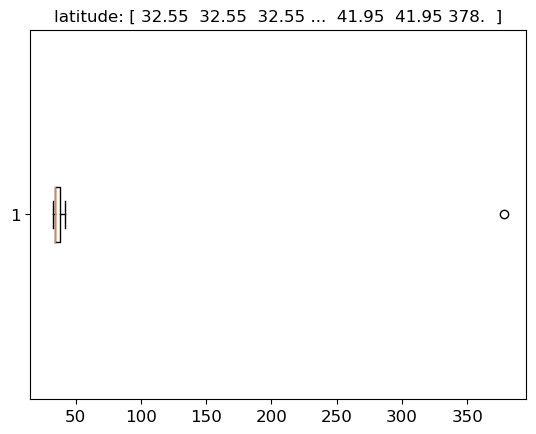

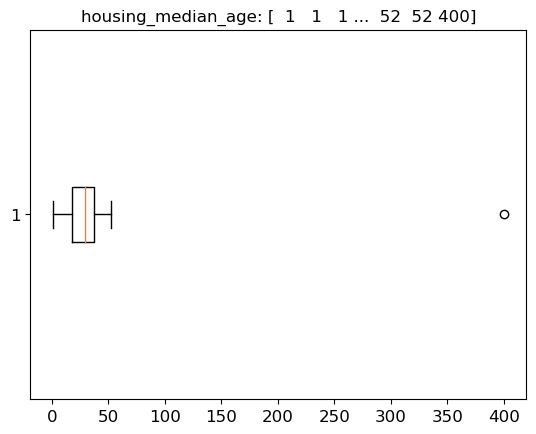

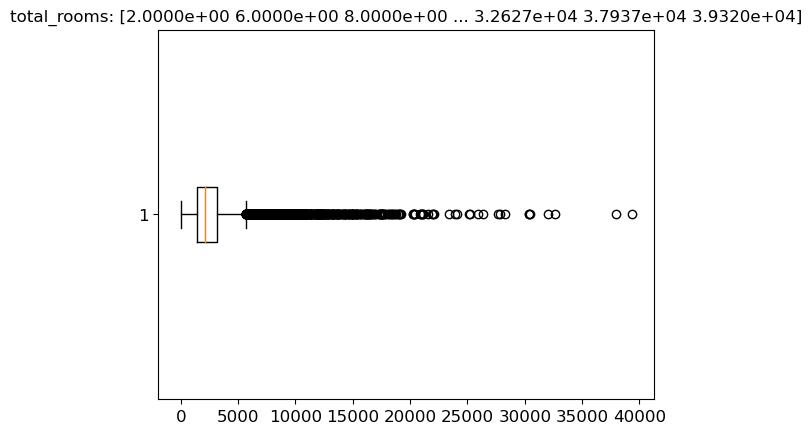

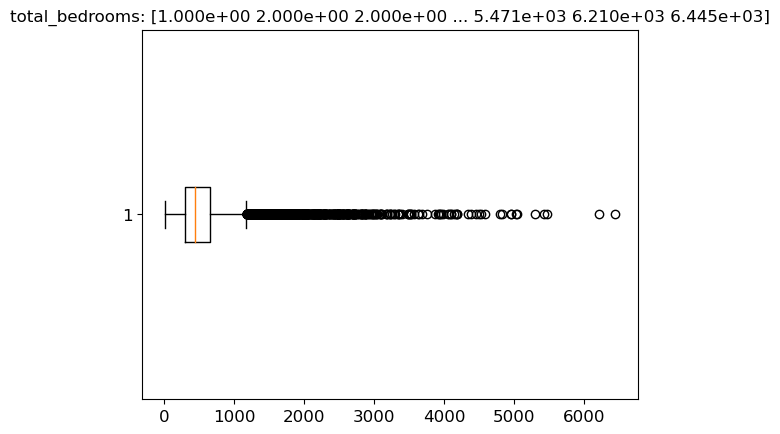

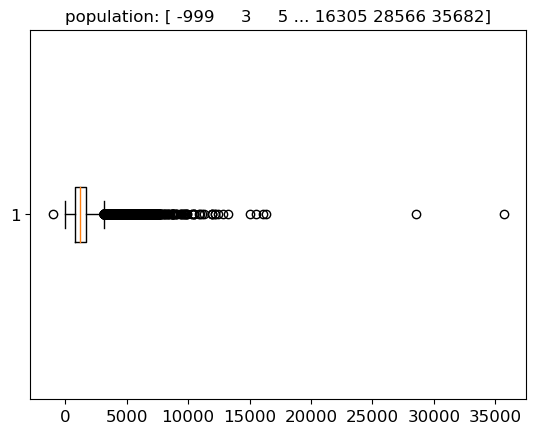

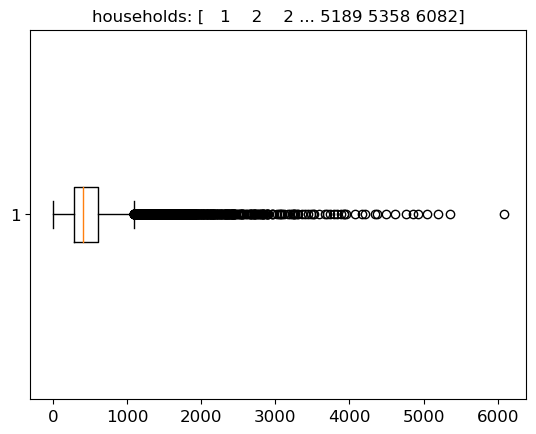

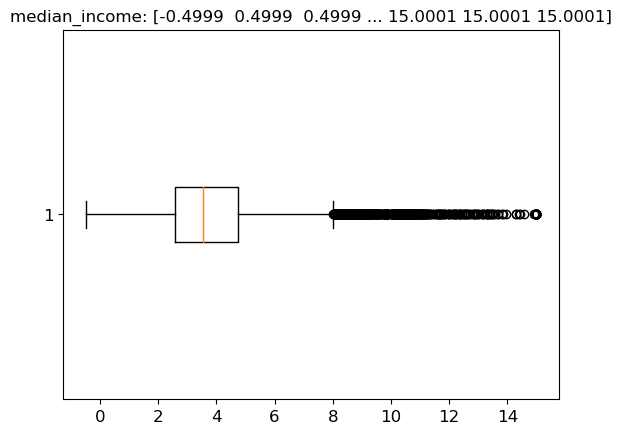

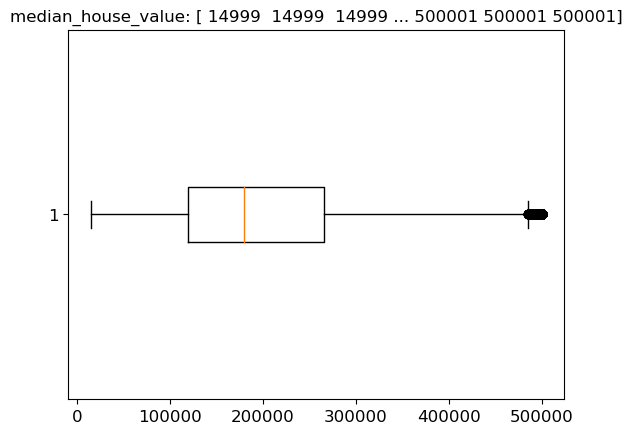

In [16]:
# Visualise using boxplots
for feat in housing.columns:
    plt.boxplot(housing[feat],vert=False)
    plt.title(f'{feat}: {np.sort(housing.loc[:,feat])}')
    plt.show()

### **The Strengths and Weaknesses of Boxplots**

So boxplots show you where the 'big features' of the data are. These can include the median, first and third quartile ranges and outliers. What it doesn't really tell you is what the distribution actually looks like. However, from the above figures, I am sure some look better than others. Several seem to have 'a bajillion' outliers and only on one side. This is strongly indicative of non-normally distributed data (whether skewed or conforming to some other distribution).

longitude: [-124.35 -124.3  -124.3  ... -114.49 -114.47 -114.31]


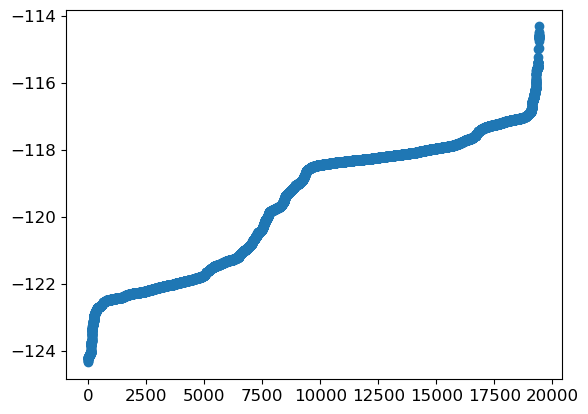

latitude: [ 32.55  32.55  32.55 ...  41.95  41.95 378.  ]


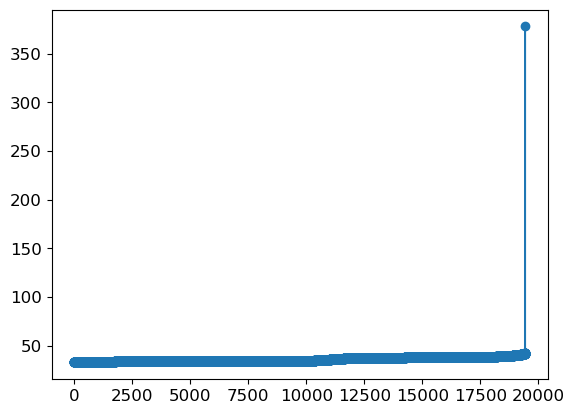

housing_median_age: [  1   1   1 ...  52  52 400]


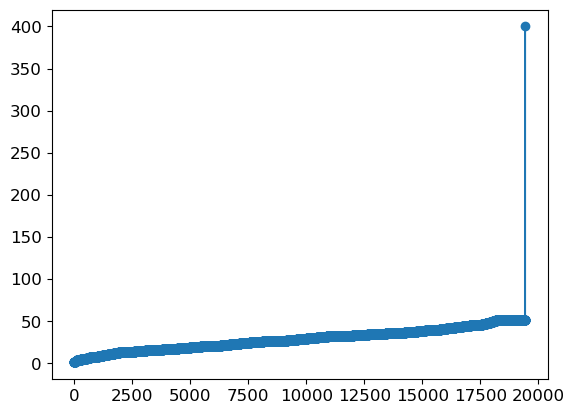

total_rooms: [2.0000e+00 6.0000e+00 8.0000e+00 ... 3.2627e+04 3.7937e+04 3.9320e+04]


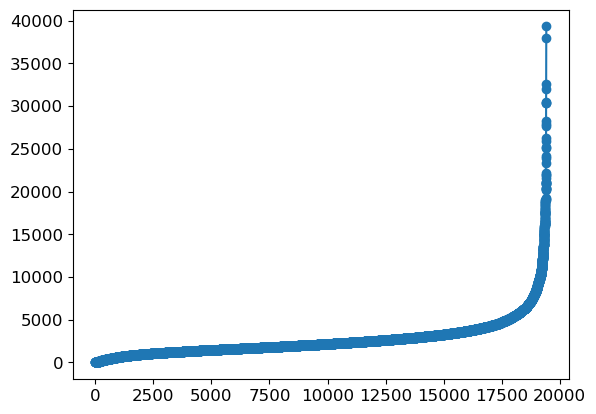

total_bedrooms: [1.000e+00 2.000e+00 2.000e+00 ... 5.471e+03 6.210e+03 6.445e+03]


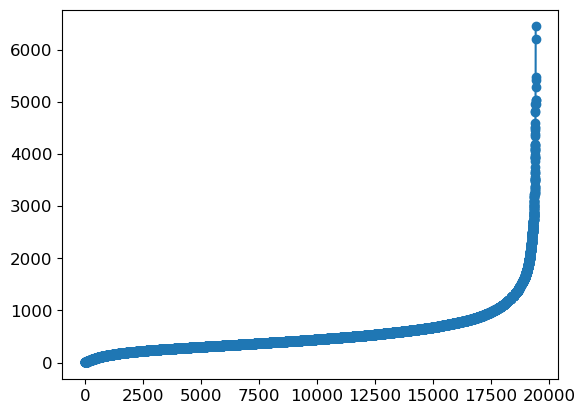

population: [ -999     3     5 ... 16305 28566 35682]


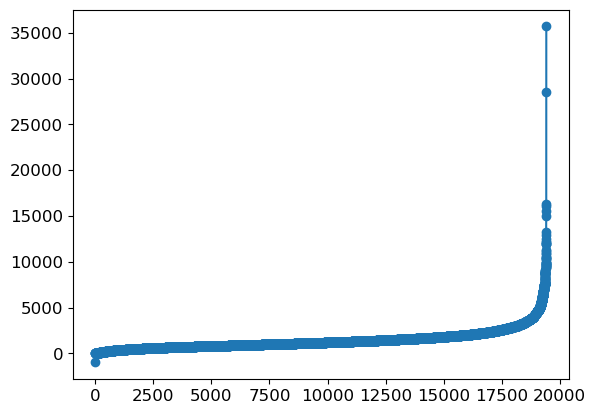

households: [   1    2    2 ... 5189 5358 6082]


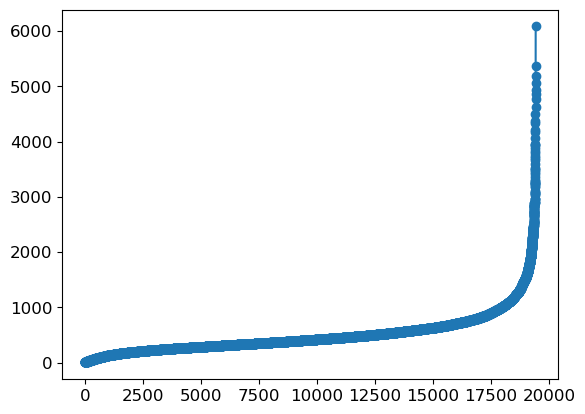

median_income: [-0.4999  0.4999  0.4999 ... 15.0001 15.0001 15.0001]


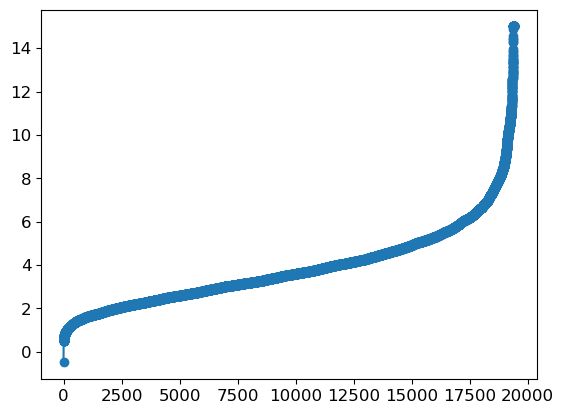

median_house_value: [ 14999  14999  14999 ... 500001 500001 500001]


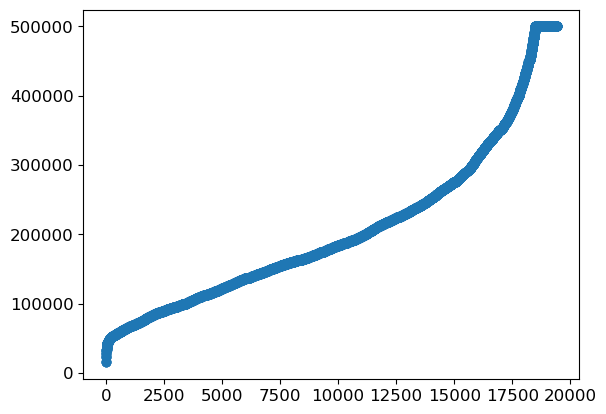

In [17]:
# Visualise using sorted values
for feat in housing.columns:
    print(f'{feat}: {np.sort(housing.loc[:,feat])}')
    # We show the sorted values of each feature
    plt.plot(np.sort(housing.loc[:,feat]),'-o')
    plt.show()

### **Viewing as sorted data**

What we are looking for in the above is how wobbly the line is. For normally distributed data, we would expect the sorted list to be over-represented in the middle with a flattish-curve followed by less data at the left and right where it is slightly steeper. This would represent the fact that if most of the data is in the middle then you'd need a lot of extra data points to move up and down on the y-axis, whereas at the tails of the distributions there are fewer points which vary more.

Also note, that some of the lines are made less readable by the presence of one or more outliers.

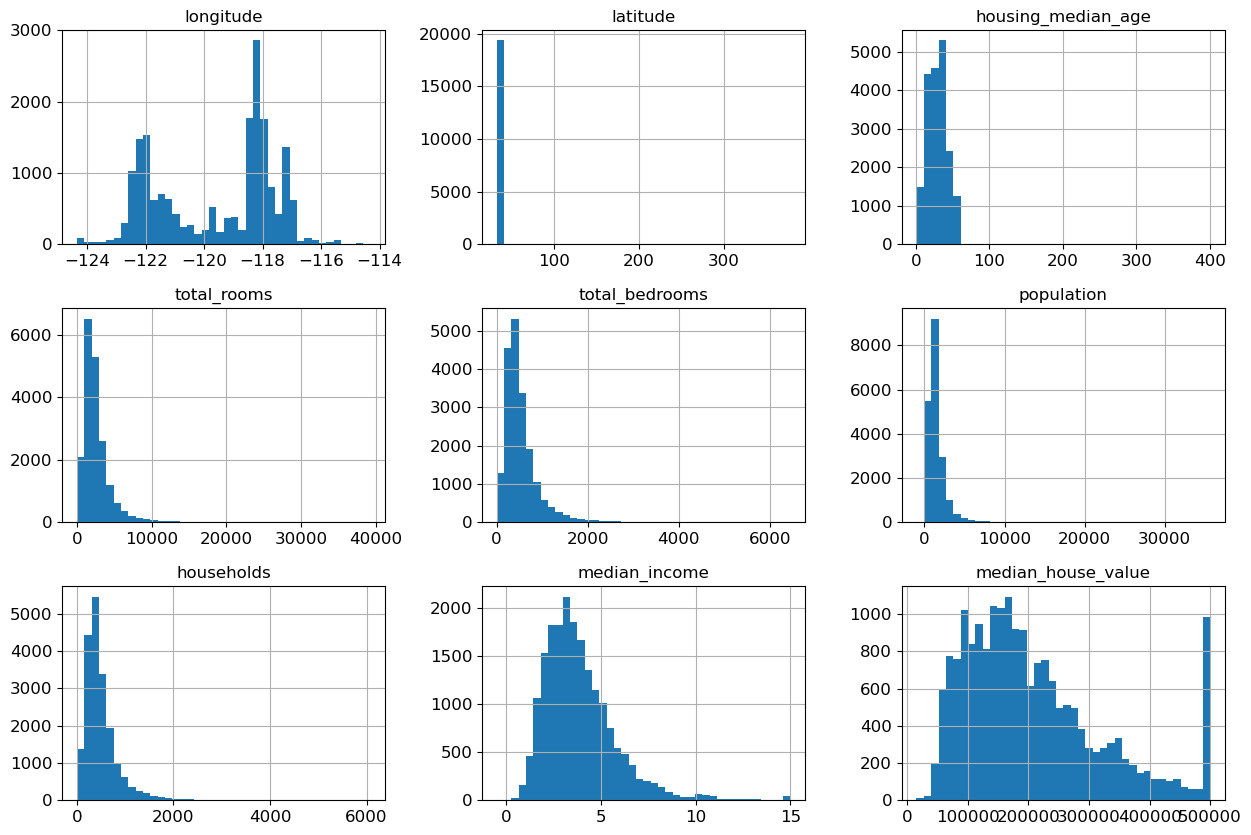

In [18]:
# Visualise using histograms
dummy = housing.hist(bins=40, figsize=(15, 10))

### **Histograms**

As you can see in the above subplots, histograms are far more effective at communicating the desired information. From the histogram, we can see that longitude is all over the place (perhaps two main distributions). We can see that latitude... well we can't see anything useful about latitude. This is where learning to fiddle with the options in figures is really important. However, for the other dataset (with well chosen x-ranges) the shape of the data is clear. Households, median income, median house value show skewed normalish distributions. With Median income and median house value you can see that the data has a good number of samples over the range (it isn't really, really spiky, unlike longitude).

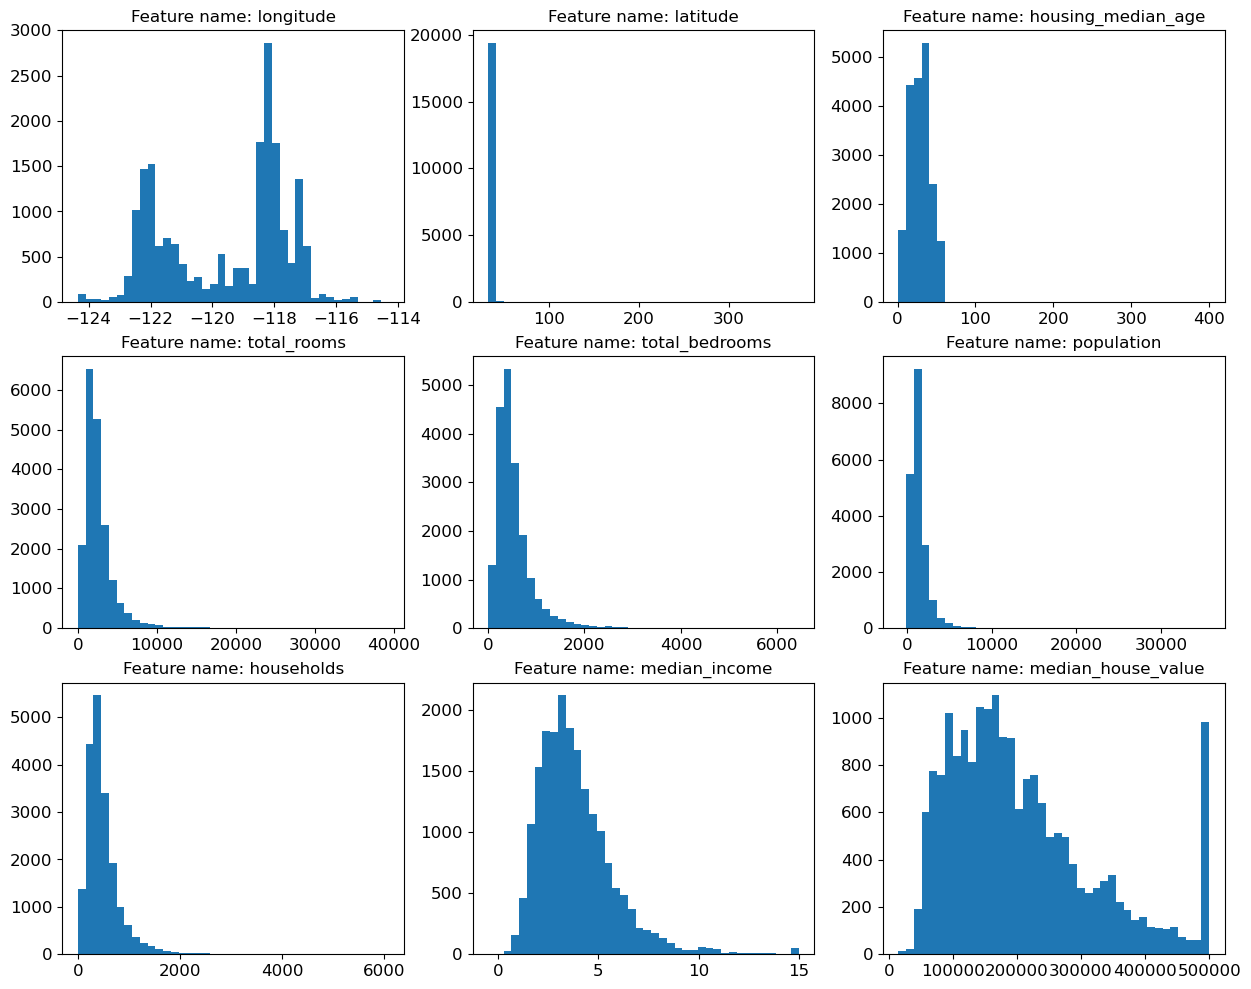

In [19]:
# Alternative using matplotlib
plt.figure(figsize=(15, 12))
nfeat = housing.shape[1]
# Select the number of columns in our main plot 
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(housing.iloc[:,n],bins=40)
    plt.title(f'Feature name: {housing.columns[n]}')
plt.show()

In [20]:
# After reviewing these values you can aware that some of them either have strange behaviours or are errors.

# Checking data, we identify a 'potential' wrong value of latitude, which value is over 350. We can check this sample.
housing.loc[housing['latitude'] > 350,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
220,-122.21,378.0,39,2003.0,500.0,1109,464,3.0682,156500


In [21]:
# We can replace this value for nan
housing.loc[housing['latitude'] > 350,'latitude'] = np.nan

# As we introduced a new nan value, we need to remove the entire row with the missing value
housing = housing.dropna()

### **Matplot Lib does better**
Though not perfect, the matplotlib version of histogram appears to have chosen things a little more sensibly by default.


### **Where next?**

Now fix various problems with features, as identified from the above visualisations and descriptive tables. We go to compare the differences when we remove missing values vs when we impute them.

In [22]:
# Let's load it from scratch again and have a look at what imputation looks like
housing = pd.read_csv("workshop2.csv")

# Take a copy of the dataframe
# Note that this is not a true *deep* copy, as not all lower level structures are copied
# See copy.deepcopy for a true deep copy (though we don't need this now)
housing_copy = housing.copy()
housing_copy.drop(columns=['ocean_proximity'],inplace=True)
# We still have missing value issues (see row 10)
print(housing_copy['total_rooms'][8:12])

8     2555
9     3549
10      ??
11    3503
Name: total_rooms, dtype: object


In [23]:
# If we try to calculate the medians, it will stuff up sadly (nan ruins them)
# medians = np.median(housing_copy,axis=0)
# print(medians)

In [24]:
# Convert to numerical, then drop all problem rows (this is only one option for dealing with these)
housing_copy = housing_copy.apply(pd.to_numeric, errors="coerce")
na_version = housing_copy.dropna()

print(housing_copy[8:12])
print(na_version[8:12])
# We can now see the missing rows

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
10    -122.26     37.85                  52          NaN           434.0   
11    -122.26     37.85                  52       3503.0           752.0   

    population  households  median_income  median_house_value  
8         1206         595         2.0804              226700  
9         1551         714         3.6912              261100  
10         910         402         3.2031              281500  
11        1504         734         3.2705              241800  
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
11    -122.26     37.85                  52       3503.0           752.

### **Calculate the medians**

One of the easiest ways of imputing data in a large data (not necessarily the most accurate) is to just replace all the missing values with the median value found in that column.

In [25]:
# Estimate medians now that data is tidied up (though it would not change much)
medians = np.median(na_version, axis=0)  # You need to decide on the right axis to use
print(medians)

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1260e+03  4.3500e+02  1.1660e+03
  4.1000e+02  3.5385e+00  1.8010e+05]


In [26]:
# Perform imputation using median values (it is critical that this is done _after_ tidying data up)
for n in range(housing_copy.shape[1]):
    housing_copy.iloc[:, n] = housing_copy.iloc[:, n].fillna(medians[n])

# Look for the Nan??
print(housing_copy[8:12])

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
10    -122.26     37.85                  52       2126.0           434.0   
11    -122.26     37.85                  52       3503.0           752.0   

    population  households  median_income  median_house_value  
8         1206         595         2.0804              226700  
9         1551         714         3.6912              261100  
10         910         402         3.2031              281500  
11        1504         734         3.2705              241800  


In [27]:
# Load the data using a pandas function
housing = pd.read_csv("workshop2.csv")

housing.drop(columns=['ocean_proximity'],inplace=True)
housing = housing.apply(pd.to_numeric, errors="coerce")
housing.dropna(inplace=True)

# An alternative way to do imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
housing_np = imputer.fit_transform(housing)
print(type(housing_np))

print("Total remaining NaNs:", np.isnan(housing_np).sum())

<class 'numpy.ndarray'>
Total remaining NaNs: 0


### **Preparing data for modeling**

In [28]:
# Now we can split our data in y and X
y = housing_np[:,8] # target 
X = housing_np[:,0:8] # features

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [29]:
# Now, we can split our dataset in train and test
from sklearn.model_selection import train_test_split

# Split using a ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [30]:
# Now  we can implement a linear regression model 
from sklearn.linear_model import LinearRegression

# Create a model object
model = LinearRegression()
# Train a model
model.fit(X_train,y_train)

LinearRegression()

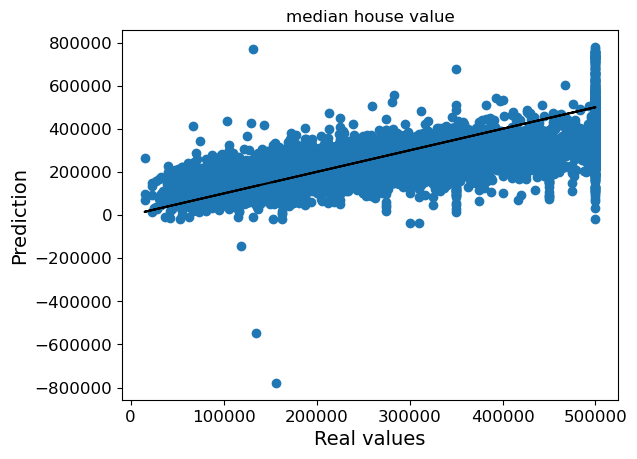

In [31]:
# We can do prediction in train set
pred_train = model.predict(X_train)

# We can compare with the real output
plt.scatter(y_train,pred_train)
plt.plot(y_train,y_train,'k')
plt.title("median house value")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [32]:
# We can do prediction in test set
pred_test = model.predict(X_test)

In [33]:
# Also, we can check the performance of our model
from sklearn.metrics import mean_squared_error

# Check the performance in train
print("The mean squared error in training is:", mean_squared_error(y_train,pred_train))

# Check the performance in test
print("The mean squared error in testing is:", mean_squared_error(y_test,pred_test))

The mean squared error in training is: 5758069794.3279915
The mean squared error in testing is: 5705573252.512219


## **Now What?**

* Considering your analysis from previous plots, try to fix the wrong values using imputation or removing rows. Choose the best way how to fix each case. After that, train again your model and predict in train and testing data. Compare the performance with the previous case. 

### **How much these mistakes can affect my data?**

In [34]:
# Code to see how many good rows are left if a small amount of data corruption occurs with multiple features
ns = 400   # don’t use np for number of people, as it hides the np that stands for numpy!
nf = 100   # number of features
errate = 0.008   # error rate (equal to all the features)
vals = np.random.rand(ns,nf)   # uniform random numbers in [0,1]
errs = vals<errate  # Is True for specified error rate
nerrs = np.sum(errs,axis=1)   # number of errors per subject
print(np.sum(nerrs==0)/ns*100)   # percentage of subjects with complete records (no errors)

44.75
